In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycaret

In [253]:
data_orig=pd.read_csv("car.csv")
data_orig.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [254]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [255]:
data_orig.nunique()

name          525
company        48
year           61
Price         274
kms_driven    258
fuel_type       3
dtype: int64

# Name Column

In [256]:
data=data_orig.copy()
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


<Axes: xlabel='name', ylabel='Count'>

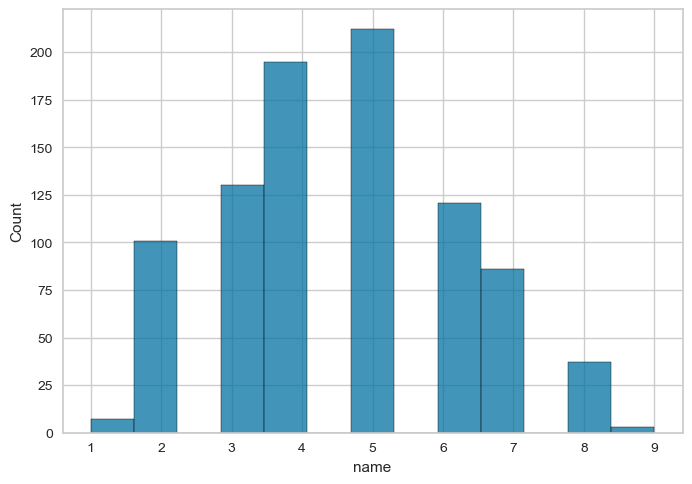

In [257]:
# No. words in name column strings
name_cnt_ser=(data['name'].str.split()).apply(lambda x:len(x))
sns.histplot(name_cnt_ser)


In [258]:
# second and third word considered as model, if there are less than three words first two are considered as model
data['Model']=(data['name'].str.split()).apply(lambda x:x[1]+" "+x[2] if len(x)>2 else x[0]+x[1] if(len(x)==2) else x[0])
data

,name,company,year,Price,kms_driven,fuel_type,Model
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,Jeep CL550
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,Suzuki Alto
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,Grand i10
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,EcoSport Titanium
...,...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN,Ta
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel,Zest XM
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel,Quanto C8
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN,Amaze 1.2


In [259]:
data['Model'].nunique()

302

# Year Column

In [260]:
data['year'].nunique()

61

In [261]:
# All non numeric values (None, other string values are removed)
data.loc[~data['year'].str.isnumeric(),'year']=None


<Axes: xlabel='year', ylabel='Count'>

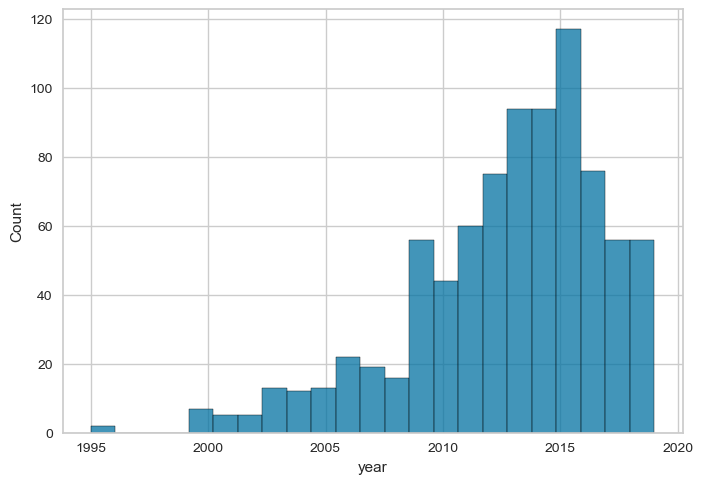

In [262]:
sns.histplot(data['year'].astype('float'))

In [263]:
# Missing values imputed by mode
data['year']=data['year'].astype('float')
data['year']=data['year'].fillna(data['year'].mode()[0])
data['year']=data['year'].astype('int')
data

,name,company,year,Price,kms_driven,fuel_type,Model
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,Jeep CL550
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,Suzuki Alto
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,Grand i10
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,EcoSport Titanium
...,...,...,...,...,...,...,...
887,Ta,Tara,2015,"3,10,000",NaN,NaN,Ta
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel,Zest XM
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel,Quanto C8
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN,Amaze 1.2


# Price Column

In [264]:
# chkptdf1 = data.copy()
data = chkptdf1.copy()
data

,name,company,year,Price,kms_driven,fuel_type,Model
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,Jeep CL550
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,Suzuki Alto
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,Grand i10
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,EcoSport Titanium
...,...,...,...,...,...,...,...
887,Ta,Tara,2015,"3,10,000",NaN,NaN,Ta
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel,Zest XM
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel,Quanto C8
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN,Amaze 1.2


In [265]:
# Price column string datatype converted to numeric
data['Price']=data['Price'].str.replace(",","")

data=data[data['Price'].str.isnumeric()].reset_index(drop=True)
data['Price']=data['Price'].astype('int')
data

,name,company,year,Price,kms_driven,fuel_type,Model
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol,Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel,Jeep CL550
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol,Grand i10
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel,EcoSport Titanium
4,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel,FordFigo
...,...,...,...,...,...,...,...
852,Ta,Tara,2015,310000,NaN,NaN,Ta
853,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel,Zest XM
854,Mahindra Quanto C8,Mahindra,2013,390000,"40,000 kms",Diesel,Quanto C8
855,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN,Amaze 1.2


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    int32 
 3   Price       857 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
 6   Model       857 non-null    object
dtypes: int32(2), object(5)
memory usage: 40.3+ KB


# kms_driven column

In [267]:
chkptdf2 = data.copy()
data = chkptdf2.copy()

In [268]:
# kms_driven column string datatype converted to numeric
data['kms_driven']=data['kms_driven'].str.replace(",","").str.extract('(\d+)')
data['kms_driven']=data['kms_driven'].astype('float')

<Axes: ylabel='kms_driven'>

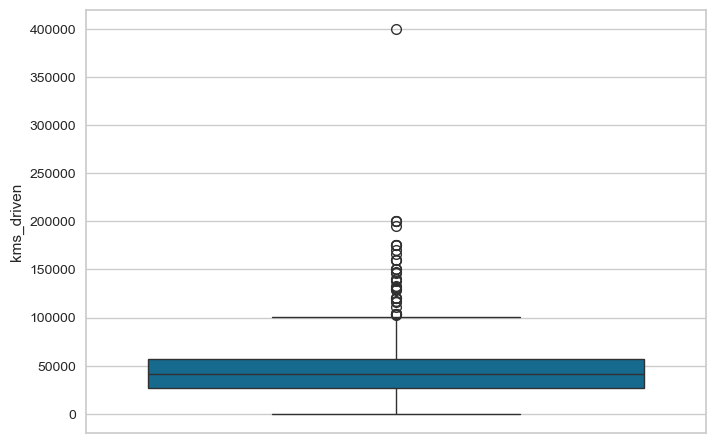

In [269]:
sns.boxplot(data['kms_driven'])

In [270]:
# Missing values imputed by median since outliers are present
data['kms_driven']=data['kms_driven'].fillna(data['kms_driven'].median())

# Fuel Type Column

In [271]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [272]:
data[data['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type,Model
128,Toyota Corolla,Toyota,2009,275000,26000.0,NaN,ToyotaCorolla
189,"Tata indigo ecs LX, 201",Tata,2015,150000,41000.0,NaN,indigo ecs
200,MARUTI SUZUKI DESI,MARUTI,2015,400000,41000.0,NaN,SUZUKI DESI
287,Yama,Yamaha,2015,55000,41000.0,NaN,Yama
374,Maruti Suzuki Swift Dzire car,Maruti,2015,300000,41000.0,NaN,Suzuki Swift
383,Maruti Suzuki Swift Dzire Tour (Gat,Maruti,2015,300000,41000.0,NaN,Suzuki Swift
389,URJE,URJENT,2015,180000,41000.0,NaN,URJE
402,Swift Dzire Tour 27 Dec 2016 Regis,Swift,2015,370000,41000.0,NaN,Dzire Tour
420,Tata zest x,Tata,2015,320000,41000.0,NaN,zest x
421,Mahindra xyl,Mahindra,2015,350000,41000.0,NaN,Mahindraxyl


In [273]:
# Missing values imputed by mode
data['fuel_type']=data['fuel_type'].fillna(data['fuel_type'].mode()[0])
data

,name,company,year,Price,kms_driven,fuel_type,Model
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000.0,Petrol,Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40.0,Diesel,Jeep CL550
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000.0,Petrol,Grand i10
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000.0,Diesel,EcoSport Titanium
4,Ford Figo,Ford,2012,175000,41000.0,Diesel,FordFigo
...,...,...,...,...,...,...,...
852,Ta,Tara,2015,310000,41000.0,Petrol,Ta
853,Tata Zest XM Diesel,Tata,2018,260000,27000.0,Diesel,Zest XM
854,Mahindra Quanto C8,Mahindra,2013,390000,40000.0,Diesel,Quanto C8
855,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,41000.0,Petrol,Amaze 1.2


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        857 non-null    object 
 1   company     857 non-null    object 
 2   year        857 non-null    int32  
 3   Price       857 non-null    int32  
 4   kms_driven  857 non-null    float64
 5   fuel_type   857 non-null    object 
 6   Model       857 non-null    object 
dtypes: float64(1), int32(2), object(4)
memory usage: 40.3+ KB


# Visualisations

<Axes: xlabel='company', ylabel='Price'>

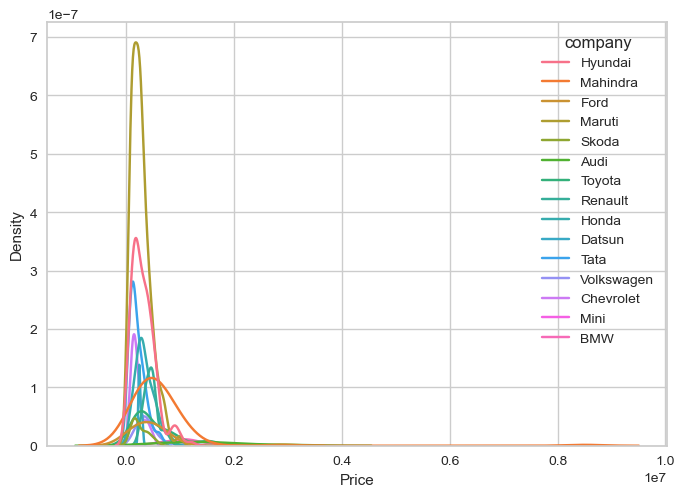

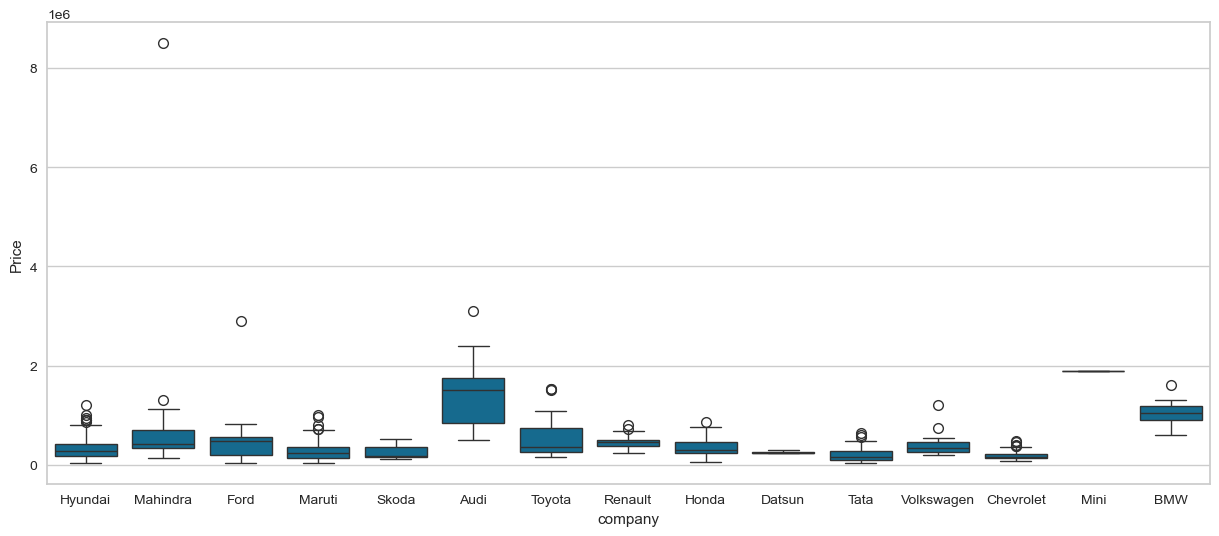

In [275]:
# Price varaitions of top 15 frequent companies
data[data['company'].isin(data['company'].value_counts()[:15].index)]

sns.kdeplot(data[data['company'].isin(data['company'].value_counts()[:15].index)],x='Price', hue="company")

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data[data['company'].isin(data['company'].value_counts()[:15].index)],y='Price', x="company",ax=ax)



<Axes: xlabel='Price', ylabel='Density'>

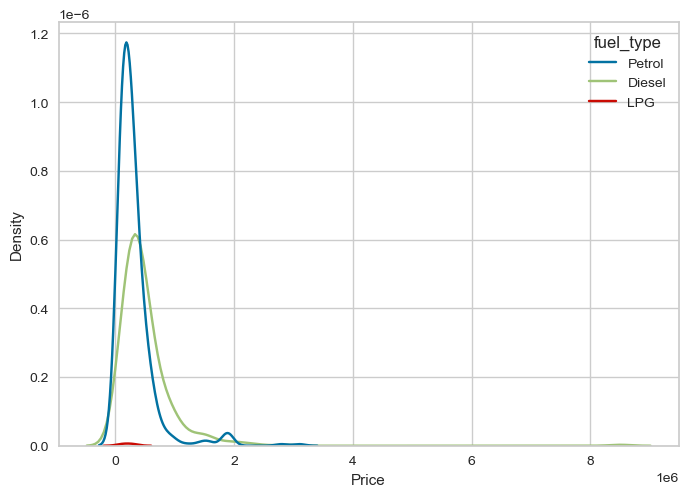

In [276]:
sns.kdeplot(data,x='Price', hue="fuel_type")


<Axes: xlabel='kms_driven', ylabel='Price'>

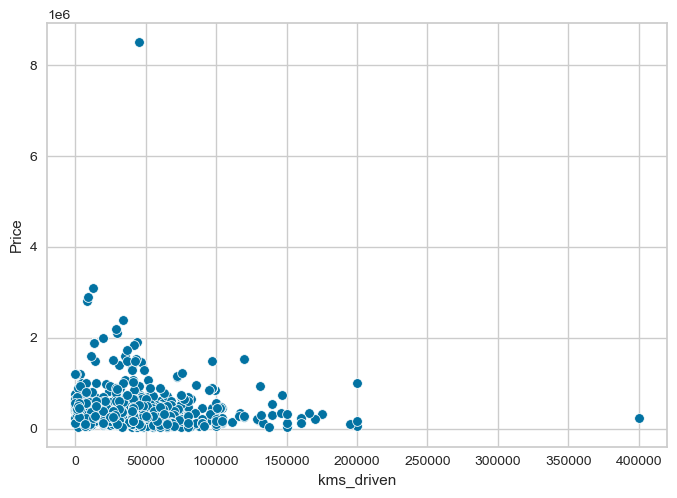

In [277]:
sns.scatterplot(data,x='kms_driven', y="Price")


<Axes: xlabel='year', ylabel='Price'>

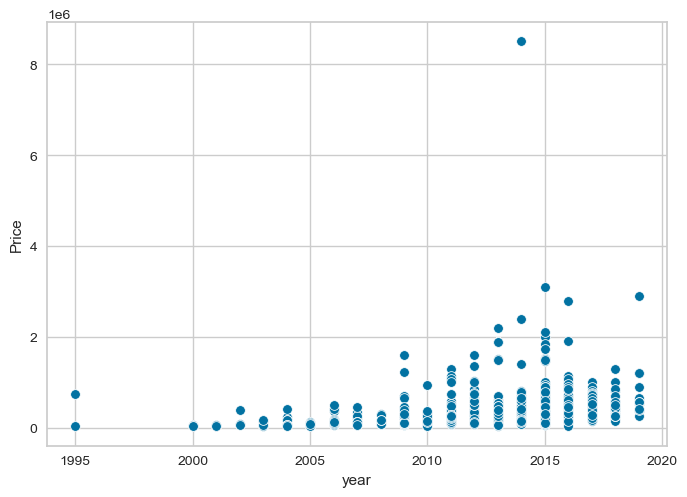

In [278]:
sns.scatterplot(data,x='year', y="Price")


<Axes: xlabel='Price', ylabel='Count'>

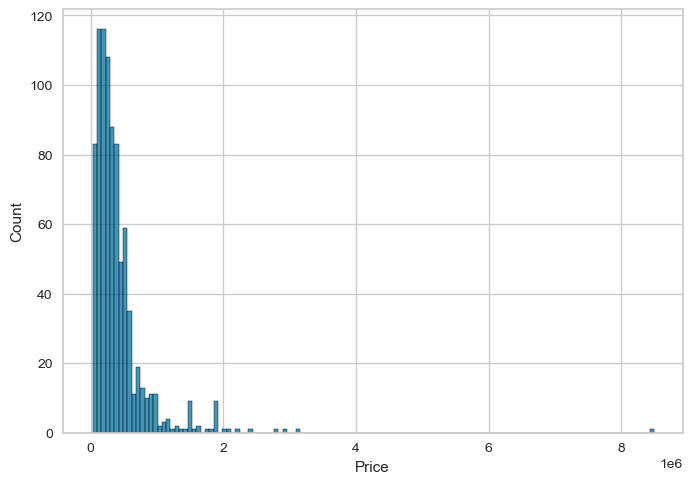

In [279]:
sns.histplot(data['Price'])
sns.histplot(np.log(data['Price']))


In [283]:
data[['year', 'Price', 'kms_driven']].corr()

,year,Price,kms_driven
year,1.000000,0.336535,-0.246636
Price,0.336535,1.000000,-0.151083
kms_driven,-0.246636,-0.151083,1.000000


# Prediction

In [286]:
# data_preprcss_chkpt_df=data.copy()
data=data_preprcss_chkpt_df.copy()
# data_preprcss_chkpt_df

In [287]:
data['year']=data['year'].clip(2000,2024)               #Year clipped
data['kms_driven']=data['kms_driven'].clip(0,200000)    #Kms_driven clipped

data[data['Price']==data['Price'].max()]                #Price of one row is abnormally high and not a round figure, might be error point
data.loc[545,'Price']=850000

top_15 = [x for x in data['company'].value_counts().head(15).index]     #one hot encoding f top 15 company names
top_15
data_ml=data.copy()
for label in top_15:
    data_ml[label] = np.where(data_ml['company']==label,1,0)
data_ml=data_ml.drop(['company','name'],axis=1)

data=data.drop(['name'],axis=1)                 # Drop Name and model columns

# data['Price'] = np.log(data['Price'])

data

,company,year,Price,kms_driven,fuel_type,Model
0,Hyundai,2007,80000,45000.0,Petrol,Santro Xing
1,Mahindra,2006,425000,40.0,Diesel,Jeep CL550
2,Hyundai,2014,325000,28000.0,Petrol,Grand i10
3,Ford,2014,575000,36000.0,Diesel,EcoSport Titanium
4,Ford,2012,175000,41000.0,Diesel,FordFigo
...,...,...,...,...,...,...
852,Tara,2015,310000,41000.0,Petrol,Ta
853,Tata,2018,260000,27000.0,Diesel,Zest XM
854,Mahindra,2013,390000,40000.0,Diesel,Quanto C8
855,Honda,2014,180000,41000.0,Petrol,Amaze 1.2


In [290]:
from pycaret.regression import *
s = setup(data, target = 'Price', session_id = 124)
best = compare_models()

,Description,Value
0,Session id,124
1,Target,Price
2,Target type,Regression
3,Original data shape,"(857, 6)"
4,Transformed data shape,"(857, 8)"
5,Transformed train set shape,"(599, 8)"
6,Transformed test set shape,"(258, 8)"
7,Numeric features,2
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,113318.9871,60618233393.8682,215223.1101,0.5821,0.4953,0.4080,0.0560
lightgbm,Light Gradient Boosting Machine,119509.3937,60019462034.4444,214544.7138,0.5745,0.4889,0.4133,0.0530
rf,Random Forest Regressor,118233.0750,61856355486.5353,217408.8204,0.5708,0.4996,0.4250,0.0630
gbr,Gradient Boosting Regressor,125089.1274,61753644818.3916,218866.3381,0.5638,0.5115,0.4566,0.0360
dt,Decision Tree Regressor,124509.0935,66725289849.5608,231320.3625,0.5076,0.5275,0.4286,0.0230
knn,K Neighbors Regressor,137996.5444,66530339011.8090,232651.5694,0.5049,0.5521,0.5140,0.0290
ada,AdaBoost Regressor,153455.3347,66787988185.6770,236715.8583,0.4833,0.6145,0.6794,0.0340
en,Elastic Net,177775.1251,72041984645.6080,249880.7045,0.4309,1.0953,0.7199,0.0230
llar,Lasso Least Angle Regression,177923.3883,72197699360.3668,250185.2669,0.4289,1.1308,0.7197,0.0230
lasso,Lasso Regression,177923.4071,72197743560.2501,250185.3195,0.4289,1.1308,0.7197,0.0250


In [292]:
# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Model Results
* Model 1: With actual data after preprocessing

    | Model | Model	    |         RMSE	    |   R2	|
    | --- | --- | --- | --- |
    | gbr	| Gradient Boosting Regressor  |    381108.7305	 |    0.3146	| 
    |  et	| Extra Trees Regressor	|         380160.5574	|     0.3040	|
   
<br/>

* Model 2: Removed Outliers using clipping and changing price of outlier Mahindra XUV500 W6 row 545

    | Model | Model	    |         RMSE	    |   R2	|
    | --- | --- | --- | --- |
    | lightgbm | 	Light Gradient Boosting Machine | 	231747.2979| 	0.4938| 
    | knn	| K Neighbors Regressor | 		233794.0547| 	0.4925| 	

<br/>

* Model 3: Model 2 with Dropped name column

    | Model | Model	    |         RMSE	    |   R2	|
    | --- | --- | --- | --- |
    | et	  |       Extra Trees Regressor	      |       215223.1101	|     0.5821	| 
    | lightgbm	| Light Gradient Boosting Machine	|     214544.7138	|     0.5745	| 

    Remarks: Accuracy improved

<br/>

* Model 4: Model 2 Company column transformed by top 15 companies one hot encoded values, Dropped company and name column

    | Model | Model	    |         RMSE	    |   R2	|
    | --- | --- | --- | --- |
    |  et	| Extra Trees Regressor	  |   215274.9288	| 0.5845	|
    |  gbr	| Gradient Boosting Regressor| 	217696.4688	| 0.5719	|

    Remarks: No much improvement

<br/>

* Model 5: Model 3 with price column skewed distribution changed to Normal using Log conversion

    | Model | Model	    |         RMSE	    |   R2	|
    | --- | --- | --- | --- |
    | et	| Extra Trees Regressor	| 	0.4713	|  0.5865 | 	
    | gbr	| Gradient Boosting Regressor| 	0.4741	|  0.5847 | 	

    Remarks: No much improvement

* Model 3 is used finally 


In [310]:
et_regr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,212294.3948,210783950820.6143,459112.1332,0.1654,0.6647,0.5363
1,73557.4142,15573500924.0398,124793.8337,0.7383,0.3269,0.2422
2,97611.9876,21334780247.3006,146064.3018,0.8253,0.5188,0.5219
3,136346.7093,47540567462.9398,218037.9955,0.3297,0.5314,0.4769
4,94672.6581,27434695417.4682,165634.2218,0.7032,0.5025,0.4712
5,76708.1745,21258713448.0633,145803.6812,0.8050,0.4769,0.4176
6,71047.4503,10887741189.8652,104344.3395,0.6823,0.4296,0.3666
7,87011.4621,21209772117.9958,145635.7515,0.7186,0.4784,0.4384
8,110225.4948,45312649855.3580,212867.6816,0.7530,0.4160,0.3113


In [309]:
import numpy as np
# etmodl = [create_model('et', learning_rate=i) for i in np.arange(0.1,1,0.1)]
tuned_et_regr= tune_model(et_regr, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,209960.2838,203237713900.1658,450818.9369,0.1952,0.6393,0.5032
1,84784.6724,16592044897.9905,128810.1118,0.7212,0.3391,0.2717
2,90435.2977,15372104077.5702,123984.2896,0.8741,0.4481,0.4293
3,149599.6187,49954604259.6110,223505.2667,0.2957,0.5402,0.4997
4,109672.1807,30902423750.4459,175790.8523,0.6657,0.5077,0.5016
5,90098.2122,22320520493.6372,149400.5371,0.7952,0.4969,0.4685
6,76210.1142,11628781322.3840,107836.8273,0.6606,0.4429,0.3938
7,97826.2528,20815662622.1865,144276.3412,0.7239,0.4878,0.4741
8,116319.7760,42584956247.9188,206361.2276,0.7679,0.4226,0.3347


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [311]:
predictions = predict_model(best, data=data.sample(20))
predictions.head()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,81634.8765,14450457428.6412,120210.0554,0.7504,0.5542,0.5962


,company,year,kms_driven,fuel_type,Model,Price,prediction_label
850,Tata,2009,30000.0,Diesel,Indica V2,110000,90800.00
272,Renault,2018,20000.0,Diesel,Lodgy 85,689999,401349.15
629,Mahindra,2016,29500.0,Diesel,TUV300 T4,540000,548999.93
544,Maruti,2011,65000.0,Diesel,Suzuki Swift,140000,255000.00
351,Mahindra,2015,15000.0,Diesel,MahindraXUV500,1000000,924899.97


In [313]:
predictions['Abs_Error']=abs(predictions['Price']-predictions['prediction_label'])
predictions

,company,year,kms_driven,fuel_type,Model,Price,prediction_label,Error,Abs_Error
850,Tata,2009,30000.0,Diesel,Indica V2,110000,90800.00,19200.00,19200.00
272,Renault,2018,20000.0,Diesel,Lodgy 85,689999,401349.15,288649.85,288649.85
629,Mahindra,2016,29500.0,Diesel,TUV300 T4,540000,548999.93,8999.93,8999.93
544,Maruti,2011,65000.0,Diesel,Suzuki Swift,140000,255000.00,115000.00,115000.00
351,Mahindra,2015,15000.0,Diesel,MahindraXUV500,1000000,924899.97,75100.03,75100.03
154,Maruti,2010,38500.0,Diesel,Suzuki Swift,189500,260279.97,70779.97,70779.97
439,Maruti,2018,25500.0,Petrol,Suzuki Wagon,395000,319750.00,75250.00,75250.00
33,Toyota,2012,82000.0,Diesel,Innova 2.0,650000,623500.00,26500.00,26500.00
855,Honda,2014,41000.0,Petrol,Amaze 1.2,180000,323390.00,143390.00,143390.00
114,Maruti,2009,46000.0,Petrol,Suzuki Dzire,220000,220000.00,0.00,0.00
